# IMPORTING THE LIBRARIES 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt1 

import statistics
import os

###############################################
from peakutils import indexes
from peakutils import baseline
from scipy.signal import find_peaks as fp
from scipy.signal import savgol_filter 

###############################################
from bokeh.plotting import figure , show
from pybaselines import whittaker as pl



from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

# DATA ARRANGEMENT

In the main directory we can see that there are 8 subfolders. 

Each subfolder have almost 12 spectras per sample , the idea behind that would be , instead of having just one spectra per sample , and to just rely on one information , its always better have to multiple measurements per samples , and then this could be used for building the Calibration Model

Instead of having 12 different csv per samples , its always good to have a single dataframe -> This new dataframe will have 1st column as wavelength , and 2nd -13th column as Intensities 

In [3]:
def load_data(folder_path):
    # List to store DataFrames for intensity columns
    intensity_dfs = []

    # List to store CSV file names
    csv_file_names = []

    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            
            # Read CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Extract intensity column and store it in the list
            intensity_dfs.append(df.iloc[:, 1])  # Assuming intensity is in the second column
            
            # Store CSV file name
            csv_file_names.append(os.path.splitext(file_name)[0])

    # Read the wavelength column from the first CSV file
    wavelength_df = pd.read_csv(os.path.join(folder_path, os.listdir(folder_path)[1]), usecols=[0])

    # Concatenate wavelength column with intensity columns
    result_df = pd.concat([wavelength_df] + intensity_dfs, axis=1)

    # Rename the columns with CSV file names
    column_names = ['wavelength'] + [f'{csv_file_names[i]}' for i in range(len(intensity_dfs))]

    result_df.columns = column_names
    # result_df.reset_index(drop=True, inplace=True)

    return result_df

Loading the dataframe.

In [4]:
SAMPLE1_Raw_df = load_data('Batch_2/sample_1')
###################################################
SAMPLE2_Raw_df = load_data('Batch_2/sample_2')
###################################################
SAMPLE3_Raw_df = load_data('Batch_2/sample_3')
###################################################
SAMPLE4_Raw_df = load_data('Batch_2/sample_4')
###################################################
SAMPLE5_Raw_df = load_data('Batch_2/sample_5')
###################################################
SAMPLE6_Raw_df = load_data('Batch_2/sample_6')
###################################################
SAMPLE7_Raw_df = load_data('Batch_2/sample_7')
####################################################
SAMPLE8_Raw_df = load_data('Batch_2/sample_8')
####################################################
SAMPLE9_Raw_df = load_data('Batch_3/sample_9')
####################################################
SAMPLE10_Raw_df = load_data('Batch_3/sample_10')
####################################################
SAMPLE11_Raw_df = load_data('Batch_3/sample_11')
####################################################
SAMPLE12_Raw_df = load_data('Batch_3/sample_12')
####################################################
SAMPLE13_Raw_df = load_data('Batch_3/sample_13')
####################################################
SAMPLE14_Raw_df = load_data('Batch_3/sample_14')
####################################################
SAMPLE15_Raw_df = load_data('Batch_3/sample_15')
####################################################
SAMPLE16_Raw_df = load_data('Batch_3/sample_16')
####################################################
SAMPLE17_Raw_df = load_data('Batch_3/sample_17')
####################################################

SAMPLE1_Raw_df

wavelength  sample1_10  sample1_11  sample1_12  sample1_9  sample1_8  \
0      180.000000         0.0         0.0         0.0        0.0        0.0   
1      180.033333         0.0         0.0         0.0        0.0        0.0   
2      180.066667         0.0         0.0         0.0        0.0        0.0   
3      180.100000         0.0         0.0         0.0        0.0        0.0   
4      180.133333         0.0         0.0         0.0        0.0        0.0   
...           ...         ...         ...         ...        ...        ...   
23426  960.866667         0.0         0.0         0.0        0.0        0.0   
23427  960.900000         0.0         0.0         0.0        0.0        0.0   
23428  960.933333         0.0         0.0         0.0        0.0        0.0   
23429  960.966667         0.0         0.0         0.0        0.0        0.0   
23430  961.000000         0.0         0.0         0.0        0.0        0.0   

       sample1_5  sample1_4  sample1_6  sample1_7  sample1_3  sample1_2  \
0            0.0        0.0        0.0        0.0        0.0        0.0   
1            0.0        0.0        0.0        0.0        0.0        0.0   
2            0.0        0.0        0.0        0.0        0.0        0.0   
3            0.0        0.0        0.0        0.0        0.0        0.0   
4            0.0        0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
23426        0.0        0.0        0.0        0.0        0.0        0.0   
23427        0.0        0.0        0.0        0.0        0.0        0.0   
23428        0.0        0.0        0.0        0.0        0.0        0.0   
23429        0.0        0.0        0.0        0.0        0.0        0.0   
23430        0.0        0.0        0.0        0.0        0.0        0.0   

       sample1_1  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
23426        0.0  
23427        0.0  
23428        0.0  
23429        0.0  
23430        0.0  

[23431 rows x 13 columns]

# Peak Selection and Data Trimming

The dataframe  which we have is very big ,it could be trimmed now according to the wavelength , by adjusting two parameters "Wavelength_Min" , "Wavelength_Max"

In [5]:
# peak = 251.611
# peak_min = (peak - 50) 
# peak_max = (peak + 50) 

#Getting the full wavelength
Wavelength_Min = 230
Wavelength_Max = 540


SAMPLE1_Select_df = SAMPLE1_Raw_df[(SAMPLE1_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE1_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE2_Select_df = SAMPLE2_Raw_df[(SAMPLE2_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE2_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE3_Select_df = SAMPLE3_Raw_df[(SAMPLE3_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE3_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE4_Select_df = SAMPLE4_Raw_df[(SAMPLE4_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE4_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE5_Select_df = SAMPLE5_Raw_df[(SAMPLE5_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE5_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE6_Select_df = SAMPLE6_Raw_df[(SAMPLE6_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE6_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE7_Select_df = SAMPLE7_Raw_df[(SAMPLE7_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE7_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE8_Select_df = SAMPLE8_Raw_df[(SAMPLE8_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE8_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE9_Select_df = SAMPLE9_Raw_df[(SAMPLE9_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE9_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE10_Select_df = SAMPLE10_Raw_df[(SAMPLE10_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE10_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE11_Select_df = SAMPLE11_Raw_df[(SAMPLE11_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE11_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE12_Select_df = SAMPLE12_Raw_df[(SAMPLE12_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE12_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE13_Select_df = SAMPLE13_Raw_df[(SAMPLE13_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE13_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE14_Select_df = SAMPLE14_Raw_df[(SAMPLE14_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE14_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE15_Select_df = SAMPLE15_Raw_df[(SAMPLE15_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE15_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE16_Select_df = SAMPLE16_Raw_df[(SAMPLE16_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE16_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE17_Select_df = SAMPLE17_Raw_df[(SAMPLE17_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE17_Raw_df['wavelength'] <= Wavelength_Max)]


SAMPLE1_Select_df


wavelength   sample1_10   sample1_11   sample1_12   sample1_9  \
1501   230.033333   733.854998   757.083612   733.157643  555.787237   
1502   230.066667   672.325844   696.449231   673.799449  515.185710   
1503   230.100000   620.360863   644.278172   622.453715  480.379656   
1504   230.133333   600.589937   623.311112   601.526194  465.458455   
1505   230.166667   604.088462   625.174104   603.213030  465.731271   
...           ...          ...          ...          ...         ...   
10795  539.833333   980.388803  1018.121334   982.500553  685.803852   
10796  539.866667   916.721930   951.185409   921.067369  655.564284   
10797  539.900000   921.132954   954.639798   925.468952  674.584075   
10798  539.933333   972.542838  1006.752288   975.244841  718.443812   
10799  539.966667  1037.327005  1072.801304  1037.904506  761.936344   

         sample1_8    sample1_5    sample1_4    sample1_6    sample1_7  \
1501    749.103641   695.428111   709.469981   741.636580   753.050690   
1502    686.646443   638.742285   658.051584   680.506208   693.543551   
1503    637.574497   609.923112   641.000781   647.052572   655.077327   
1504    620.648761   608.576733   649.865449   642.604402   644.254741   
1505    624.335582   613.654567   652.998984   647.327961   648.870687   
...            ...          ...          ...          ...          ...   
10795   968.085804   958.057824   960.008594   976.423269   957.671792   
10796   921.224879   928.560718   924.104791   947.999482   935.666214   
10797   943.340204   958.193173   948.629686   981.868398   971.989745   
10798  1001.419523  1014.938467  1002.561307  1043.399493  1032.888176   
10799  1061.337881  1066.977724  1055.056539  1098.182914  1084.835454   

         sample1_3    sample1_2   sample1_1  
1501    730.221672   601.843812  550.960498  
1502    672.114203   601.447118  587.408250  
1503    646.935708   629.790984  638.407145  
1504    650.604064   640.017448  645.458262  
1505    655.837573   593.192285  561.882901  
...            ...          ...         ...  
10795   973.226802   981.818121  914.824420  
10796   940.472362   927.017453  858.478783  
10797   968.200660   936.451920  870.989924  
10798  1024.468102   981.935085  921.450667  
10799  1077.521786  1034.761593  978.400879  

[9299 rows x 13 columns]

Lets plot a line plot ,to get a better picture 

In [6]:
Selected_df_Plot = figure(title = 'Selected Data Plot' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')

Selected_df_Plot.line(SAMPLE1_Select_df.wavelength,SAMPLE1_Select_df.sample1_6 , line_width = 2, color ="blue")
#####################################################################################################################
Selected_df_Plot.line(SAMPLE2_Select_df.wavelength,SAMPLE2_Select_df.sample2_6 , line_width = 2, color ="orange")
###############################################################################################################
Selected_df_Plot.line(SAMPLE3_Select_df.wavelength,SAMPLE3_Select_df.sample3_6 , line_width = 2, color ="green")
######################################################################################################################
Selected_df_Plot.line(SAMPLE4_Select_df.wavelength,SAMPLE4_Select_df.sample4_6 , line_width = 2, color ="red")
##############################################################################################################
Selected_df_Plot.line(SAMPLE5_Select_df.wavelength,SAMPLE5_Select_df.sample5_6 , line_width = 2, color ="purple")
###############################################################################################################
Selected_df_Plot.line(SAMPLE6_Select_df.wavelength,SAMPLE6_Select_df.sample6_6 , line_width = 2, color ="brown")
####################################################################################################################
Selected_df_Plot.line(SAMPLE7_Select_df.wavelength,SAMPLE7_Select_df.sample7_6 , line_width = 2, color ="pink")
##################################################################################################################
Selected_df_Plot.line(SAMPLE8_Select_df.wavelength,SAMPLE8_Select_df.sample8_6 , line_width = 2, color ="gray")
###################################################################################################################
Selected_df_Plot.line(SAMPLE9_Select_df.wavelength,SAMPLE9_Select_df.sample9_6 , line_width = 2, color ="olive")
###################################################################################################################
Selected_df_Plot.line(SAMPLE10_Select_df.wavelength,SAMPLE10_Select_df.sample10_6 , line_width = 2, color ="Cyan")
###################################################################################################################
Selected_df_Plot.line(SAMPLE11_Select_df.wavelength,SAMPLE11_Select_df.sample11_6 , line_width = 2, color ="black")
###################################################################################################################
Selected_df_Plot.line(SAMPLE12_Select_df.wavelength,SAMPLE12_Select_df.sample12_6 , line_width = 2, color ="tomato")
###################################################################################################################
Selected_df_Plot.line(SAMPLE13_Select_df.wavelength,SAMPLE13_Select_df.sample13_6 , line_width = 2, color ="steelblue")
###################################################################################################################
Selected_df_Plot.line(SAMPLE14_Select_df.wavelength,SAMPLE14_Select_df.sample14_6 , line_width = 2, color ="limegreen")
###################################################################################################################
Selected_df_Plot.line(SAMPLE15_Select_df.wavelength,SAMPLE15_Select_df.sample15_6 , line_width = 2, color ="deeppink")
###################################################################################################################
Selected_df_Plot.line(SAMPLE16_Select_df.wavelength,SAMPLE16_Select_df.sample16_6 , line_width = 2, color ="gold")
###################################################################################################################
Selected_df_Plot.line(SAMPLE17_Select_df.wavelength,SAMPLE17_Select_df.sample17_6 , line_width = 2, color ="indigo")
###################################################################################################################

Selected_df_Plot.width = 900
Selected_df_Plot.height = 500
show(Selected_df_Plot)

# Data Preprocessing of the Spectra

The above plot eventhough a spectra , is still a Raw Spectra , which still has lot of Artifects , before proceeding for the Univariate Calibration , its important to Pre Process the Raw Spectra accordingly. Various Pre Processing Techniques could be used here :- 

1) Baseline Correction - Very Very little  background radiation is still present in the spectra, which corresponds to the spectral baseline and imposes difficulties for quantitative elemental analysis.

In [7]:
def baseline_correction(df):
    """
    Perform baseline correction on the intensity columns of the input DataFrame and create a new DataFrame with corrected values.
    
    Parameters:
        df (DataFrame): Input DataFrame containing the wavelength and intensity columns.
        
    Returns:
        DataFrame: New DataFrame with baseline-corrected intensity columns and the same wavelength column as the input DataFrame.
    """
    # Copy the 'wavelength' column from the input DataFrame
    new_df = pd.DataFrame({'wavelength': df['wavelength']})
    
    # Perform baseline correction for each intensity column and add them to the new DataFrame
    for col in df.columns[1:]:  # Exclude the 'wavelength' column
        baseline, _ = pl.asls(df[col])
        corrected_values = df[col] - baseline
        new_df[col] = corrected_values
    
    return new_df

In [8]:
SAMPLE1_BaselineCorrected_df = baseline_correction(SAMPLE1_Select_df)
SAMPLE2_BaselineCorrected_df = baseline_correction(SAMPLE2_Select_df)
SAMPLE3_BaselineCorrected_df = baseline_correction(SAMPLE3_Select_df)
SAMPLE4_BaselineCorrected_df = baseline_correction(SAMPLE4_Select_df)
SAMPLE5_BaselineCorrected_df = baseline_correction(SAMPLE5_Select_df)
SAMPLE6_BaselineCorrected_df = baseline_correction(SAMPLE6_Select_df)
SAMPLE7_BaselineCorrected_df = baseline_correction(SAMPLE7_Select_df)
SAMPLE8_BaselineCorrected_df = baseline_correction(SAMPLE8_Select_df)
SAMPLE9_BaselineCorrected_df = baseline_correction(SAMPLE9_Select_df)
SAMPLE10_BaselineCorrected_df = baseline_correction(SAMPLE10_Select_df)
SAMPLE11_BaselineCorrected_df = baseline_correction(SAMPLE11_Select_df)
SAMPLE12_BaselineCorrected_df = baseline_correction(SAMPLE12_Select_df)
SAMPLE13_BaselineCorrected_df = baseline_correction(SAMPLE13_Select_df)
SAMPLE14_BaselineCorrected_df = baseline_correction(SAMPLE14_Select_df)
SAMPLE15_BaselineCorrected_df = baseline_correction(SAMPLE15_Select_df)
SAMPLE16_BaselineCorrected_df = baseline_correction(SAMPLE16_Select_df)
SAMPLE17_BaselineCorrected_df = baseline_correction(SAMPLE17_Select_df)

SAMPLE1_BaselineCorrected_df

wavelength  sample1_10  sample1_11  sample1_12   sample1_9   sample1_8  \
1501   230.033333  747.345822  770.553304  745.926602  565.119394  760.989198   
1502   230.066667  668.711757  692.201074  669.531433  511.066871  680.953188   
1503   230.100000  599.641858  622.312157  601.148716  462.809815  614.302422   
1504   230.133333  562.765992  583.627218  563.184190  434.437596  579.797845   
1505   230.166667  549.159535  567.772287  547.833979  421.259362  565.905783   
...           ...         ...         ...         ...         ...         ...   
10795  539.833333  243.713238  253.351664  242.352130  144.368771  209.053549   
10796  539.866667  177.930573  184.228934  178.797045  112.503464  159.926416   
10797  539.900000  180.225790  185.496504  181.076711  129.897504  179.775518   
10798  539.933333  229.519857  235.422166  228.730674  172.131484  235.588606   
10799  539.966667  292.188206  299.284350  289.268412  213.998258  293.240730   

        sample1_5   sample1_4   sample1_6   sample1_7   sample1_3   sample1_2  \
1501   701.307800  724.131384  740.128757  749.173475  740.591974  620.278765   
1502   627.523801  654.935542  661.342713  671.595407  664.513940  603.106690   
1503   581.606449  620.107287  610.233397  615.058246  621.364874  614.675168   
1504   563.161870  611.194481  588.129526  586.164701  607.062635  608.126227   
1505   551.141464  596.550503  575.197343  572.709646  594.325509  544.525621   
...           ...         ...         ...         ...         ...         ...   
10795  180.229395  186.365714  187.634532  175.653297  185.261135  208.219660   
10796  148.376321  148.114028  156.818213  151.291755  150.119781  151.131583   
10797  175.652794  170.291025  188.294581  185.259307  175.461151  158.278627   
10798  230.042099  221.874741  247.433119  243.801751  229.341655  201.474362   
10799  279.725363  272.022064  299.823980  293.393039  280.008400  252.013438   

        sample1_1  
1501   614.490857  
1502   634.809453  
1503   669.679187  
1504   660.601125  
1505   560.896546  
...           ...  
10795  189.871869  
10796  131.384456  
10797  141.753809  
10798  190.072758  
10799  244.881172  

[9299 rows x 13 columns]

In [9]:
Baseline_Correction_Plot = figure(title = 'Baseline Correction' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')

Baseline_Correction_Plot.line(SAMPLE1_Select_df.wavelength,SAMPLE1_Select_df.sample1_1 , line_width = 2, color ="red" )
Baseline_Correction_Plot.line(SAMPLE1_BaselineCorrected_df.wavelength,SAMPLE1_BaselineCorrected_df.sample1_1 , line_width = 2, color ="green" )



Baseline_Correction_Plot.width = 900
Baseline_Correction_Plot.height = 500
show(Baseline_Correction_Plot)

2) Normalization - Its usually noticed that , for a measurement of a similar sample ,there is a lot of scattering in the intensities , this typical artifect is called scattering.

For Instance , you could see the plot above , Though this are the plots from the same sample SAMPLE1 , measured on 12 different Areas , its quite visible , for some  spectras , the peak heights or Intensities are not same.


In [10]:
def standard_normal_variate_normalization(df):
    # Select columns containing intensities
    intensity_cols = df.columns[1:]  #  columns 2 to 13 are intensities and are stored in intensity_cols

    # SVN normalization
    for col in intensity_cols:
        mean_intensity = df[col].mean()
        std_intensity = df[col].std()
        df[col] = (df[col] - mean_intensity) / std_intensity

    return df

In [11]:

def total_intensity_normalization(df):
    # Selecting only the intensity columns (assuming the first column is wavelength)
    intensities = df.iloc[:, 1:]  

    # Initialize an empty DataFrame to store normalized intensities
    normalized_intensities = pd.DataFrame()

    # Iterate over each column (each spectrum)
    for column in intensities.columns:
        spectrum = intensities[column]
        total_intensity = spectrum.sum()
        
        # Normalize the spectrum by dividing each intensity value by the total intensity
        normalized_spectrum = spectrum / total_intensity
        
        # Append the normalized spectrum to the DataFrame of normalized intensities
        normalized_intensities[column] = normalized_spectrum

    # Combine the wavelength column with normalized intensities
    normalized_df = pd.concat([df.iloc[:, 0], normalized_intensities], axis=1)

    return normalized_df

In [12]:

def unit_norm_normalization(df):
    # Selecting only the intensity columns (assuming the first column is wavelength)
    intensities_1 = df.iloc[:, 1:]  
    
    # Initialize an empty DataFrame to store normalized intensities
    normalized_intensities_1 = pd.DataFrame()

    # Iterate over each column (each spectrum)
    for column_1 in intensities_1.columns:
        spectrum_1 = intensities_1[column_1]
        
        # Calculate the norm of the spectrum using a simple equation
        spectrum_norm = np.sqrt(np.sum(spectrum_1 ** 2))
        
        # Normalize the spectrum by dividing each intensity value by its norm
        normalized_spectrum_1 = spectrum_1 / spectrum_norm
        
        # Assign the normalized spectrum to the DataFrame of normalized intensities
        normalized_intensities_1[column_1] = normalized_spectrum_1

    # Combine the wavelength column with normalized intensities
    normalized_df_1 = pd.concat([df.iloc[:, 0], normalized_intensities_1], axis=1)
    
    return normalized_df_1


In [13]:

def max_intensity_normalization(df):
    # Selecting only the intensity columns (assuming the first column is wavelength)
    intensities_2 = df.iloc[:, 1:]  

    # Initialize an empty DataFrame to store normalized intensities
    normalized_intensities_2 = pd.DataFrame()

    # Iterate over each column (each spectrum)
    for column_2 in intensities_2.columns:
        spectrum_2 = intensities_2[column_2]
        
        # Find the maximum intensity value in the spectrum
        max_intensity = spectrum_2.max()
        
        # Normalize the spectrum by dividing each intensity value by the maximum intensity
        normalized_spectrum_2 = spectrum_2 / max_intensity
        
        # Assign the normalized spectrum to the DataFrame of normalized intensities
        normalized_intensities_2[column_2] = normalized_spectrum_2

    # Combine the wavelength column with normalized intensities
    normalized_df_2 = pd.concat([df.iloc[:, 0], normalized_intensities_2], axis=1)

    return normalized_df_2


In [14]:
SAMPLE1_Normalized_df = max_intensity_normalization(SAMPLE1_BaselineCorrected_df)
SAMPLE2_Normalized_df = max_intensity_normalization(SAMPLE2_BaselineCorrected_df)
SAMPLE3_Normalized_df = max_intensity_normalization(SAMPLE3_BaselineCorrected_df)
SAMPLE4_Normalized_df = max_intensity_normalization(SAMPLE4_BaselineCorrected_df)
SAMPLE5_Normalized_df = max_intensity_normalization(SAMPLE5_BaselineCorrected_df)
SAMPLE6_Normalized_df = max_intensity_normalization(SAMPLE6_BaselineCorrected_df)
SAMPLE7_Normalized_df = max_intensity_normalization(SAMPLE7_BaselineCorrected_df)
SAMPLE8_Normalized_df = max_intensity_normalization(SAMPLE8_BaselineCorrected_df)
SAMPLE9_Normalized_df = max_intensity_normalization(SAMPLE9_BaselineCorrected_df)
SAMPLE10_Normalized_df = max_intensity_normalization(SAMPLE10_BaselineCorrected_df)
SAMPLE11_Normalized_df = max_intensity_normalization(SAMPLE11_BaselineCorrected_df)
SAMPLE12_Normalized_df = max_intensity_normalization(SAMPLE12_BaselineCorrected_df)
SAMPLE13_Normalized_df = max_intensity_normalization(SAMPLE13_BaselineCorrected_df)
SAMPLE14_Normalized_df = max_intensity_normalization(SAMPLE14_BaselineCorrected_df)
SAMPLE15_Normalized_df = max_intensity_normalization(SAMPLE15_BaselineCorrected_df)
SAMPLE16_Normalized_df = max_intensity_normalization(SAMPLE16_BaselineCorrected_df)
SAMPLE17_Normalized_df = max_intensity_normalization(SAMPLE17_BaselineCorrected_df)

# print(SAMPLE4_Normalized_df)

Normalized_Plot = figure(title = '12 Measurements for SAMPLE5 - Max Intensity Normalization' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')

Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_1 , line_width =2 , color = "red" , legend_label="Meas 1" )
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_2 , line_width =2 , color = "green" , legend_label="Meas 2")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_3 , line_width =2 , color = "pink"  , legend_label="Meas 3")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_4 , line_width =2 , color = "yellow", legend_label="Meas 4")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_5 , line_width =2 , color = "blue" , legend_label="Meas 5")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_6 , line_width =2 , color = "orange" , legend_label="Meas 6")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_7, line_width =2 , color = "brown"  , legend_label="Meas 7")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_8 , line_width =2 , color = "black" , legend_label="Meas 8")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_9 , line_width =2 , color = "tomato" , legend_label="Meas 9")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_10 , line_width =2 , color = "steelblue"  , legend_label="Meas 10")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_11, line_width =2 , color = "gold"  , legend_label="Meas 11")
Normalized_Plot.line(SAMPLE1_Normalized_df.wavelength,SAMPLE1_Normalized_df.sample1_12 , line_width =2 , color = "indigo"  , legend_label="Meas 12")




Normalized_Plot.width = 900
Normalized_Plot.height = 500
show(Normalized_Plot)



mean_intensity = SAMPLE8_Normalized_df['sample8_6'].mean()
std_intensity = SAMPLE8_Normalized_df['sample8_6'].std()

print(mean_intensity)
print(std_intensity)

0.05423017545513484
0.12332939171258894


3) Smoothing of the Spectrum - Now even though , the signal from the hLIBS Instrument doesn't appear to have much noise , we could still implement this additional signal smoothing steps , in our Data Processing Pipeline

In [15]:
def apply_savitzky_golay_smoothing(df, window_length=20, polyorder=15):
    # Selecting only the normalized intensity columns
    normalized_intensities = df.iloc[:, 1:]

    # Applying Savitzky-Golay smoothing to each intensity column
    smoothed_intensities = normalized_intensities.apply(lambda x: savgol_filter(x, window_length, polyorder), axis=0)

    # Combining wavelength column with smoothed intensities
    smoothed_df = pd.concat([df.iloc[:, 0], smoothed_intensities], axis=1)

    return smoothed_df

In [16]:
SAMPLE1_Smoothed_df = SAMPLE1_Normalized_df
SAMPLE2_Smoothed_df = SAMPLE2_Normalized_df
SAMPLE3_Smoothed_df = SAMPLE3_Normalized_df
SAMPLE4_Smoothed_df = SAMPLE4_Normalized_df
SAMPLE5_Smoothed_df = SAMPLE5_Normalized_df
SAMPLE6_Smoothed_df = SAMPLE6_Normalized_df
SAMPLE7_Smoothed_df = SAMPLE7_Normalized_df
SAMPLE8_Smoothed_df = SAMPLE8_Normalized_df
SAMPLE9_Smoothed_df = SAMPLE9_Normalized_df
SAMPLE10_Smoothed_df = SAMPLE10_Normalized_df
SAMPLE11_Smoothed_df = SAMPLE11_Normalized_df
SAMPLE12_Smoothed_df = SAMPLE12_Normalized_df
SAMPLE13_Smoothed_df = SAMPLE13_Normalized_df
SAMPLE14_Smoothed_df = SAMPLE14_Normalized_df
SAMPLE15_Smoothed_df = SAMPLE15_Normalized_df
SAMPLE16_Smoothed_df = SAMPLE16_Normalized_df
SAMPLE17_Smoothed_df = SAMPLE17_Normalized_df


Smoothed_Plot = figure(title = 'After Smoothing of the Spectrum' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')

Smoothed_Plot.line(SAMPLE1_Smoothed_df.wavelength,SAMPLE1_Smoothed_df.sample1_6 , line_width = 2, color ="blue" )
#####################################################################################################################
Smoothed_Plot.line(SAMPLE2_Smoothed_df.wavelength,SAMPLE2_Smoothed_df.sample2_6 , line_width = 2, color ="orange" )
###############################################################################################################
Smoothed_Plot.line(SAMPLE3_Smoothed_df.wavelength,SAMPLE3_Smoothed_df.sample3_6 , line_width = 2, color ="green")
######################################################################################################################
Smoothed_Plot.line(SAMPLE4_Smoothed_df.wavelength,SAMPLE4_Smoothed_df.sample4_6 , line_width = 2, color ="red")
#############################################################################################################
Smoothed_Plot.line(SAMPLE5_Smoothed_df.wavelength,SAMPLE5_Smoothed_df.sample5_6 , line_width = 2, color ="purple")
###############################################################################################################
Smoothed_Plot.line(SAMPLE6_Smoothed_df.wavelength,SAMPLE6_Smoothed_df.sample6_6 , line_width = 2, color ="brown")
###################################################################################################################
Smoothed_Plot.line(SAMPLE7_Smoothed_df.wavelength,SAMPLE7_Smoothed_df.sample7_6 , line_width = 2, color ="pink")
##################################################################################################################
Smoothed_Plot.line(SAMPLE8_Smoothed_df.wavelength,SAMPLE8_Smoothed_df.sample8_6 , line_width = 2, color ="gray")
# ###################################################################################################################
Smoothed_Plot.line(SAMPLE9_Smoothed_df.wavelength,SAMPLE9_Smoothed_df.sample9_6 , line_width = 2, color ="olive")
###################################################################################################################
Smoothed_Plot.line(SAMPLE10_Smoothed_df.wavelength,SAMPLE10_Smoothed_df.sample10_6 , line_width = 2, color ="Cyan")
###################################################################################################################
Smoothed_Plot.line(SAMPLE11_Smoothed_df.wavelength,SAMPLE11_Smoothed_df.sample11_6 , line_width = 2, color ="black")
###################################################################################################################
Smoothed_Plot.line(SAMPLE12_Smoothed_df.wavelength,SAMPLE12_Smoothed_df.sample12_6 , line_width = 2, color ="tomato")
###################################################################################################################
Smoothed_Plot.line(SAMPLE13_Smoothed_df.wavelength,SAMPLE13_Smoothed_df.sample13_6 , line_width = 2, color ="steelblue")
###################################################################################################################
Smoothed_Plot.line(SAMPLE14_Smoothed_df.wavelength,SAMPLE14_Smoothed_df.sample14_6 , line_width = 2, color ="limegreen")
###################################################################################################################
Smoothed_Plot.line(SAMPLE15_Smoothed_df.wavelength,SAMPLE15_Smoothed_df.sample15_6 , line_width = 2, color ="deeppink")
###################################################################################################################
Smoothed_Plot.line(SAMPLE16_Smoothed_df.wavelength,SAMPLE16_Smoothed_df.sample16_6 , line_width = 2, color ="gold")
###################################################################################################################
Smoothed_Plot.line(SAMPLE17_Smoothed_df.wavelength,SAMPLE17_Smoothed_df.sample17_6 , line_width = 2, color ="indigo")
###################################################################################################################


Smoothed_Plot.width = 1200
Smoothed_Plot.height = 500
show(Smoothed_Plot)

# Selection of ROI 

Now , as we can see , we have datapoints from wavelength , in which we defined above , but our ROI is just one peak.

In [17]:
Peak_Pos = '293.9'

Peak_Min = 293.74 

Peak_Max = 294.10

Element_name = 'Mn'

SAMPLE1_Processed_Select_df = SAMPLE1_Smoothed_df[(SAMPLE1_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE1_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE2_Processed_Select_df = SAMPLE2_Smoothed_df[(SAMPLE2_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE2_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE3_Processed_Select_df = SAMPLE3_Smoothed_df[(SAMPLE3_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE3_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE4_Processed_Select_df = SAMPLE4_Smoothed_df[(SAMPLE4_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE4_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE5_Processed_Select_df = SAMPLE5_Smoothed_df[(SAMPLE5_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE5_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE6_Processed_Select_df = SAMPLE6_Smoothed_df[(SAMPLE6_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE6_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE7_Processed_Select_df = SAMPLE7_Smoothed_df[(SAMPLE7_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE7_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE8_Processed_Select_df = SAMPLE8_Smoothed_df[(SAMPLE8_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE8_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE9_Processed_Select_df = SAMPLE9_Smoothed_df[(SAMPLE9_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE9_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE10_Processed_Select_df = SAMPLE10_Smoothed_df[(SAMPLE10_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE10_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE11_Processed_Select_df = SAMPLE11_Smoothed_df[(SAMPLE11_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE11_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE12_Processed_Select_df = SAMPLE12_Smoothed_df[(SAMPLE12_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE12_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE13_Processed_Select_df = SAMPLE13_Smoothed_df[(SAMPLE13_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE13_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE14_Processed_Select_df = SAMPLE14_Smoothed_df[(SAMPLE14_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE14_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE15_Processed_Select_df = SAMPLE15_Smoothed_df[(SAMPLE15_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE15_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE16_Processed_Select_df = SAMPLE16_Smoothed_df[(SAMPLE16_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE16_Smoothed_df['wavelength'] <= Peak_Max)]
SAMPLE17_Processed_Select_df = SAMPLE17_Smoothed_df[(SAMPLE17_Smoothed_df['wavelength'] >= Peak_Min) & (SAMPLE17_Smoothed_df['wavelength'] <= Peak_Max)]

SAMPLE14_Processed_Select_df

wavelength  sample14_1  sample14_2  sample14_3  sample14_7  sample14_6  \
3413  293.766667    0.013842    0.014976    0.015241    0.019279    0.018817   
3414  293.800000    0.014199    0.015524    0.015615    0.012662    0.012413   
3415  293.833333    0.040930    0.043128    0.043312    0.033023    0.032316   
3416  293.866667    0.075790    0.078915    0.079322    0.070077    0.068462   
3417  293.900000    0.090014    0.093276    0.093795    0.094228    0.091987   
3418  293.933333    0.070624    0.072935    0.073328    0.082677    0.080658   
3419  293.966667    0.038609    0.039757    0.039916    0.050255    0.048953   
3420  294.000000    0.018110    0.018851    0.018819    0.023455    0.022726   
3421  294.033333    0.013914    0.015039    0.014910    0.015440    0.014835   
3422  294.066667    0.015536    0.017131    0.016967    0.016788    0.016125   

      sample14_4  sample14_5  sample14_8  sample14_9  sample14_10  \
3413    0.011715    0.018830    0.018710    0.020234     0.019090   
3414    0.012420    0.012418    0.012340    0.013433     0.012695   
3415    0.035776    0.031783    0.032212    0.033932     0.032881   
3416    0.066019    0.066975    0.068281    0.071271     0.069437   
3417    0.078286    0.089812    0.091775    0.095533     0.093207   
3418    0.061394    0.078607    0.080525    0.083688     0.081738   
3419    0.033602    0.047593    0.048932    0.050812     0.049660   
3420    0.015892    0.022129    0.022723    0.023787     0.023090   
3421    0.012376    0.014757    0.014715    0.015917     0.015022   
3422    0.013853    0.016297    0.015854    0.017503     0.016214   

      sample14_11  sample14_12  
3413     0.019502     0.018629  
3414     0.013117     0.013104  
3415     0.032937     0.034511  
3416     0.068870     0.072279  
3417     0.092219     0.096622  
3418     0.080889     0.084633  
3419     0.049317     0.051431  
3420     0.023256     0.023914  
3421     0.015483     0.015482  
3422     0.016783     0.016655

In [18]:
Processed_Select_df_Plot = figure(title = 'Peak Selected Plot' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')

Processed_Select_df_Plot.line(SAMPLE1_Processed_Select_df.wavelength,SAMPLE1_Processed_Select_df.sample1_4 , line_width = 2, color ="blue")
# #####################################################################################################################
Processed_Select_df_Plot.line(SAMPLE2_Processed_Select_df.wavelength,SAMPLE2_Processed_Select_df.sample2_4 , line_width = 2, color ="orange")
# ###############################################################################################################
Processed_Select_df_Plot.line(SAMPLE3_Processed_Select_df.wavelength,SAMPLE3_Processed_Select_df.sample3_4 , line_width = 2, color ="green")
# #####################################################################################################################
Processed_Select_df_Plot.line(SAMPLE4_Processed_Select_df.wavelength,SAMPLE4_Processed_Select_df.sample4_4 , line_width = 2, color ="red")
#############################################################################################################
Processed_Select_df_Plot.line(SAMPLE5_Processed_Select_df.wavelength,SAMPLE5_Processed_Select_df.sample5_4 , line_width = 2, color ="purple")
##############################################################################################################
Processed_Select_df_Plot.line(SAMPLE6_Processed_Select_df.wavelength,SAMPLE6_Processed_Select_df.sample6_4 , line_width = 2, color ="brown")
###################################################################################################################
Processed_Select_df_Plot.line(SAMPLE7_Processed_Select_df.wavelength,SAMPLE7_Processed_Select_df.sample7_4 , line_width = 2, color ="pink")
#################################################################################################################
Processed_Select_df_Plot.line(SAMPLE8_Processed_Select_df.wavelength,SAMPLE8_Processed_Select_df.sample8_4 , line_width = 2, color ="gray")
# ##################################################################################################################
Processed_Select_df_Plot.line(SAMPLE9_Processed_Select_df.wavelength,SAMPLE9_Processed_Select_df.sample9_4 , line_width = 2, color ="olive")
###################################################################################################################
Processed_Select_df_Plot.line(SAMPLE10_Processed_Select_df.wavelength,SAMPLE10_Processed_Select_df.sample10_4 , line_width = 2, color ="Cyan")
# ###################################################################################################################
Processed_Select_df_Plot.line(SAMPLE11_Processed_Select_df.wavelength,SAMPLE11_Processed_Select_df.sample11_4 , line_width = 2, color ="black")
##################################################################################################################
Processed_Select_df_Plot.line(SAMPLE12_Processed_Select_df.wavelength,SAMPLE12_Processed_Select_df.sample12_4 , line_width = 2, color ="tomato")
##################################################################################################################
Processed_Select_df_Plot.line(SAMPLE13_Processed_Select_df.wavelength,SAMPLE13_Processed_Select_df.sample13_4 , line_width = 2, color ="steelblue")
###################################################################################################################
Processed_Select_df_Plot.line(SAMPLE14_Processed_Select_df.wavelength,SAMPLE14_Processed_Select_df.sample14_4 , line_width = 2, color ="limegreen")
###################################################################################################################
Processed_Select_df_Plot.line(SAMPLE15_Processed_Select_df.wavelength,SAMPLE15_Processed_Select_df.sample15_4 , line_width = 2, color ="deeppink")
#################################################################################################################
Processed_Select_df_Plot.line(SAMPLE16_Processed_Select_df.wavelength,SAMPLE16_Processed_Select_df.sample16_4 , line_width = 2, color ="gold")
###################################################################################################################
Processed_Select_df_Plot.line(SAMPLE17_Processed_Select_df.wavelength,SAMPLE17_Processed_Select_df.sample17_4 , line_width = 2, color ="indigo")
##################################################################################################################

Processed_Select_df_Plot.width = 500

Processed_Select_df_Plot.height = 500

Processed_Select_df_Plot.legend.title = "Samples"
Processed_Select_df_Plot.legend.location = "top_right"

show(Processed_Select_df_Plot)

# Outlier Removal

As you see from the Pic above , even after normalizing the Spectra , there are few variations in the Intensities , Before passing them to regression step , the important step would be to do Outlier Removal of the Intensities

In [19]:
def clean_intensities(processed_df, threshold):
    all_intensities = []

    for col in processed_df.columns[1:]: #PEAK EXTRACTION
        max_intensity = processed_df[col].max()
        min_intensity = processed_df[col].min()
        all_intensities.append(max_intensity)

    all_intensities = np.array(all_intensities)
    mean_intensities = np.mean(all_intensities)
    std_intensities = np.std(all_intensities)
    z_scores = np.abs((all_intensities - mean_intensities) / std_intensities)

    cleaned_intensities = [intensity for intensity, z_score in zip(all_intensities, z_scores) if z_score < threshold]

    return cleaned_intensities ,all_intensities


In [20]:
SAMPLE1_Selected_Intensities = clean_intensities(processed_df=SAMPLE1_Processed_Select_df , threshold=3 )[0]
SAMPLE2_Selected_Intensities = clean_intensities(processed_df=SAMPLE2_Processed_Select_df, threshold=3)[0]
SAMPLE3_Selected_Intensities = clean_intensities(processed_df=SAMPLE3_Processed_Select_df, threshold=3)[0]
SAMPLE4_Selected_Intensities = clean_intensities(processed_df=SAMPLE4_Processed_Select_df , threshold=3)[0]
SAMPLE5_Selected_Intensities = clean_intensities(processed_df=SAMPLE5_Processed_Select_df , threshold=3)[0]
SAMPLE6_Selected_Intensities = clean_intensities(processed_df=SAMPLE6_Processed_Select_df , threshold=3)[0]
SAMPLE7_Selected_Intensities = clean_intensities(processed_df=SAMPLE7_Processed_Select_df , threshold=3)[0]
SAMPLE8_Selected_Intensities = clean_intensities(processed_df=SAMPLE8_Processed_Select_df , threshold=3)[0]
SAMPLE9_Selected_Intensities = clean_intensities(processed_df=SAMPLE9_Processed_Select_df , threshold=3)[0]
SAMPLE10_Selected_Intensities = clean_intensities(processed_df=SAMPLE10_Processed_Select_df , threshold=3)[0]
SAMPLE11_Selected_Intensities = clean_intensities(processed_df=SAMPLE11_Processed_Select_df , threshold=3)[0]
SAMPLE12_Selected_Intensities = clean_intensities(processed_df=SAMPLE12_Processed_Select_df , threshold=3)[0]
SAMPLE13_Selected_Intensities = clean_intensities(processed_df=SAMPLE13_Processed_Select_df , threshold=3)[0]
SAMPLE14_Selected_Intensities = clean_intensities(processed_df=SAMPLE14_Processed_Select_df , threshold=3)[0]
SAMPLE15_Selected_Intensities = clean_intensities(processed_df=SAMPLE15_Processed_Select_df , threshold=3)[0]
SAMPLE16_Selected_Intensities = clean_intensities(processed_df=SAMPLE16_Processed_Select_df , threshold=3)[0]
SAMPLE17_Selected_Intensities = clean_intensities(processed_df=SAMPLE17_Processed_Select_df , threshold=3)[0]


print(SAMPLE1_Selected_Intensities)
print(SAMPLE2_Selected_Intensities)
print(SAMPLE3_Selected_Intensities)
print(SAMPLE4_Selected_Intensities)
print(SAMPLE5_Selected_Intensities)
print(SAMPLE6_Selected_Intensities)
print(SAMPLE7_Selected_Intensities)
print(SAMPLE8_Selected_Intensities)
print(SAMPLE9_Selected_Intensities)
print(SAMPLE10_Selected_Intensities)
print(SAMPLE11_Selected_Intensities)
print(SAMPLE12_Selected_Intensities)
print(SAMPLE13_Selected_Intensities)
print(SAMPLE14_Selected_Intensities)
print(SAMPLE15_Selected_Intensities)
print(SAMPLE16_Selected_Intensities)
print(SAMPLE17_Selected_Intensities)

[0.24795544783784979, 0.2528133423273976, 0.2508570820234955, 0.20967676187286513, 0.24860453610948038, 0.23874044803194236, 0.23334895653853763, 0.2451046943162593, 0.23595808257105066, 0.2329858763683281, 0.2111611746647246, 0.19773274724175186]
[0.27335268295778237, 0.2616441313716787, 0.27448112079415105, 0.25467506282259944, 0.26672749379687716, 0.2613098131149806, 0.26157899242391264, 0.2665821394416531, 0.26509977890350067, 0.2622101543968823, 0.2630328341163314, 0.26494732751878153]
[0.31846753621666934, 0.3541037879075001, 0.32619870937054424, 0.3262136857094248, 0.32780809926556587, 0.3356702672314665, 0.3352120765141575, 0.29075435557677276, 0.30937955593437394, 0.29436285219806174, 0.3151203415325762, 0.30148844371774036]
[0.13379104227535665, 0.16269012153989298, 0.15972966929440494, 0.19059515751714382, 0.13971938232373926, 0.17854582972063146, 0.17900496181352932, 0.19261389745347335, 0.15284500899653863, 0.15038299126635007, 0.1783184111971461, 0.16989806734901036]
[0.2

# REGRESSION

At the last , now we have list we have selected intensities for each sample , also we have the concentration values per element of each sample , we can now do the regression

In [21]:
# Regression for C , Mn , Si , Al ,Cr ,Cu , Ni , Nb ,Mo ,Ti (BATCH 2 and 3 COMBINED)

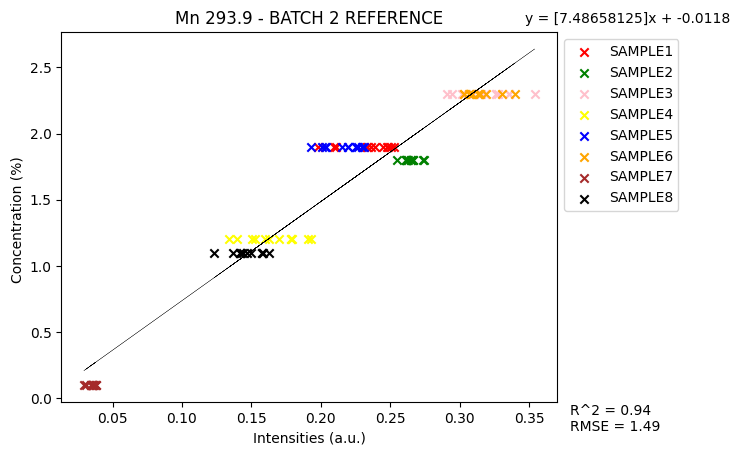

R^2 Score: 0.9353486353363597
RMSE: 1.492456021908882


In [24]:
### BATCH 2 - CALIBRATION ####

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statistics import mean

# Given data
selected_intensities = {
    'SAMPLE1':  (SAMPLE1_Selected_Intensities),
    'SAMPLE2':  (SAMPLE2_Selected_Intensities),
    'SAMPLE3':  (SAMPLE3_Selected_Intensities),
    'SAMPLE4':  (SAMPLE4_Selected_Intensities),
    'SAMPLE5':  (SAMPLE5_Selected_Intensities),
    'SAMPLE6':  (SAMPLE6_Selected_Intensities),
    'SAMPLE7':  (SAMPLE7_Selected_Intensities),
    'SAMPLE8':  (SAMPLE8_Selected_Intensities)
}

# Element data

elements = {
    'Element': ['C'  , 'Mn', 'Si', 'Al', 'Cr', 'Cu', 'N', 'Ni' , 'Nb' ,'Mo', 'Ti'],
    'SAMPLE1': [0.15 , 1.9, 0.3, 0.04, 0.41, 0.02, 0.004, 0.030, 0.006, 0.101, 0.044],
    'SAMPLE2': [0.15 , 1.8, 0.3, 0.04, 0.42, 0.02, 0.004, 0.037, 0.006, 0.105, 0.037],
    'SAMPLE3': [0.16 , 2.3, 0.5, 0.69, 0.70, 0.03, 0.003, 0.048, 0.032, 0.023, 0.025],
    'SAMPLE4': [0.23 , 1.2, 0.2, 0.03, 0.14, 0.02, 0.004, 0.020, 0.001, 0.000, 0.034],
    'SAMPLE5': [0.21 , 1.9, 1.8, 0.04, 0.05, 0.03, 0.003, 0.037, 0.056, 0.006, 0.014],
    'SAMPLE6': [0.07 , 2.3, 0.2, 0.04, 0.60, 0.02, 0.005, 0.040, 0.001, 0.020, 0.051],
    'SAMPLE7': [0.003, 0.1, 0.0, 0.02, 0.03, 0.01, 0.002, 0.020, 0.001, 0.005, 0.068],
    'SAMPLE8': [0.06 , 1.1, 0.4, 0.04, 0.03, 0.01, 0.004, 0.010, 0.046, 0.002, 0.028],
}

# Selecting an element
selected_element = Element_name

# Get y values based on selected element
y_values = [elements[key][elements['Element'].index(selected_element)] for key in selected_intensities]

x1 = selected_intensities['SAMPLE1']
x2 = selected_intensities['SAMPLE2'] 
x3 = selected_intensities['SAMPLE3'] 
x4 = selected_intensities['SAMPLE4'] 
x5 = selected_intensities['SAMPLE5'] 
x6 = selected_intensities['SAMPLE6'] 
x7 = selected_intensities['SAMPLE7'] 
x8 = selected_intensities['SAMPLE8'] 



y1 = [y_values[0]] * len(selected_intensities['SAMPLE1'])
y2 = [y_values[1]] * len(selected_intensities['SAMPLE2'])
y3 = [y_values[2]] * len(selected_intensities['SAMPLE3'])
y4 = [y_values[3]] * len(selected_intensities['SAMPLE4'])
y5 = [y_values[4]] * len(selected_intensities['SAMPLE5'])
y6 = [y_values[5]] * len(selected_intensities['SAMPLE6'])
y7 = [y_values[6]] * len(selected_intensities['SAMPLE7'])
y8 = [y_values[7]] * len(selected_intensities['SAMPLE8'])


X = np.concatenate([
                    np.array(x1).reshape(-1, 1),
                    np.array(x2).reshape(-1, 1),
                    np.array(x3).reshape(-1, 1),
                    np.array(x4).reshape(-1, 1),
                    np.array(x5).reshape(-1, 1),
                    np.array(x6).reshape(-1, 1),
                    np.array(x7).reshape(-1, 1),
                    np.array(x8).reshape(-1, 1)
                    ])

y = np.concatenate([
                    np.array(y1), 
                    np.array(y2),
                    np.array(y3),
                    np.array(y4),
                    np.array(y5),
                    np.array(y6),
                    np.array(y7),
                    np.array(y8)
                    ])



# Fit linear regression model
model = LinearRegression()
model.fit(X,y)


# # Predict y values
# y_pred = model.predict(X)

# Calculate R^2 score

r2 = model.score(X,y)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(X,y))
slope = model.coef_
intercept = model.intercept_

# # Plot scatter plot and regression line
plt.scatter(x1, y1, color='red',marker= 'x' , label='SAMPLE1')
plt.scatter(x2, y2, color='green',marker= 'x' , label='SAMPLE2')
plt.scatter(x3, y3, color='pink',marker= 'x' , label='SAMPLE3')
plt.scatter(x4, y4, color='yellow',marker= 'x' , label='SAMPLE4')
plt.scatter(x5, y5, color='blue',marker= 'x' , label='SAMPLE5')
plt.scatter(x6, y6, color='orange',marker= 'x' , label='SAMPLE6')
plt.scatter(x7, y7, color='brown',marker= 'x' , label='SAMPLE7')
plt.scatter(x8, y8, color='black',marker= 'x' , label='SAMPLE8')


title = (Element_name) + ' '+ (Peak_Pos)+ ' - BATCH 2 REFERENCE'
plt.xlabel('Intensities (a.u.)')
plt.ylabel('Concentration (%) ')
plt.title(title)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.plot(X,model.predict(X), color ='black' , linewidth = 0.2)
plt.text(0.85, 0.9, f'y = {slope:}x + {intercept:.4f}', transform=plt.gcf().transFigure, fontsize=10)
plt.text(0.92,0.05, f'R^2 = {r2:.2f}\nRMSE = {rmse:.2f}', transform=plt.gcf().transFigure, fontsize=10)
plt.savefig((title)+ ".png" ,dpi = 1200 , bbox_inches='tight')

plt.show()

print("R^2 Score:", r2)
print("RMSE:", rmse)

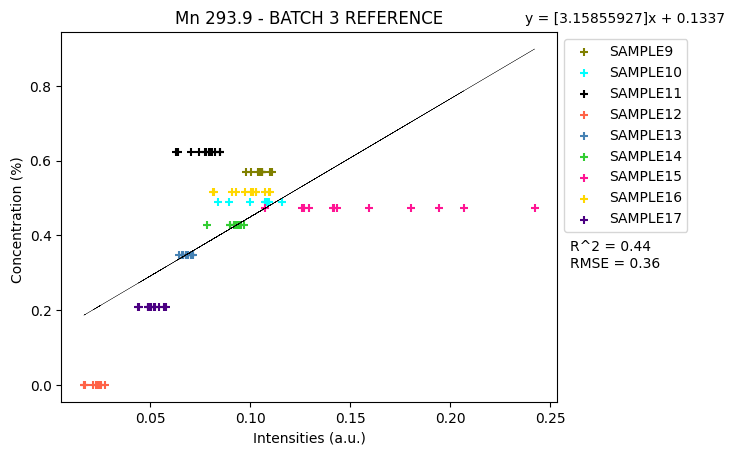

R^2 Score: 0.4431784693312809
RMSE: 0.35793467267249557


In [25]:
### BATCH 3 - CALIBRATION ####

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statistics import mean

# Given data
selected_intensities_1 = {
    'SAMPLE9':   (SAMPLE9_Selected_Intensities),
    'SAMPLE10':  (SAMPLE10_Selected_Intensities),
    'SAMPLE11':  (SAMPLE11_Selected_Intensities),
    'SAMPLE12':  (SAMPLE12_Selected_Intensities),
    'SAMPLE13':  (SAMPLE13_Selected_Intensities),
    'SAMPLE14':  (SAMPLE14_Selected_Intensities),
    'SAMPLE15':  (SAMPLE15_Selected_Intensities),
    'SAMPLE16':  (SAMPLE16_Selected_Intensities),
    'SAMPLE17':  (SAMPLE17_Selected_Intensities)
}

elements_1 = {
    'Element':  [   'C', 'Si',  'Mn',    'P',    'S',  'Cr',  'Mo',  'Ni',  'Al',  'Co',  'Cu',   'Nb',   'Ti',    'V',   'Sn',   'W',   'Zr',   'Pb',    'B'],
    'SAMPLE9':  [0.1222, 0.13, 0.571, 0.0257, 0.0075, 0.550, 0.000, 0.000, 0.280, 0.000, 0.036, 0.0191, 0.0353, 0.0071, 0.0000, 0.000, 0.0065, 0.0000, 0.0016],
    'SAMPLE10': [0.0847, 0.10, 0.489, 0.0156, 0.0140, 0.020, 0.007, 0.000, 0.413, 0.000, 0.101, 0.0000, 0.0086, 0.0038, 0.0000, 0.016, 0.0069, 0.0000, 0.0015],
    'SAMPLE11': [0.2990, 0.32, 0.622, 0.0205, 0.0079, 2.150, 0.126, 0.000, 3.430, 0.000, 0.049, 0.0337, 0.0502, 0.0246, 0.0000, 0.000, 0.0078, 0.0000, 0.0027],
    'SAMPLE12': [0.0032, 0.00, 0.000, 0.0049, 0.0058, 0.000, 0.007, 0.000, 0.000, 0.000, 0.006, 0.0000, 0.0000, 0.0000, 0.000, 0.021, 0.0055, 0.0000, 0.0000],
    'SAMPLE13': [0.2734, 0.09, 0.347, 0.0225, 0.0147, 0.021, 0.008, 0.047, 0.000, 0.000, 0.044, 0.0021, 0.0000, 0.0029, 0.0000, 0.000, 0.0071, 0.0000, 0.0009],
    'SAMPLE14': [0.8027, 0.67, 0.428, 0.0402, 0.0240, 0.591, 0.010, 0.054, 0.775, 0.000, 0.220, 0.0169, 0.0181, 0.0087, 0.0000, 0.000, 0.0091, 0.0000, 0.0019],
    'SAMPLE15': [0.6353, 0.58, 0.473, 0.0415, 0.0238, 0.184, 0.005, 0.075, 1.995, 0.000, 0.430, 0.0136, 0.0158, 0.0061, 0.0120, 0.000, 0.0121, 0.0000, 0.0023],
    'SAMPLE16': [0.6632, 0.33, 0.515, 0.0323, 0.0176, 0.194, 0.021, 0.077, 0.029, 0.000, 1.585, 0.0000, 0.0067, 0.0000, 0.0150, 0.000, 0.0000, 0.0000, 0.0018],
    'SAMPLE17': [0.0943, 0.00, 0.208, 0.0250, 0.0130, 0.007, 0.007, 0.023, 0.000, 0.000, 0.067, 0.0030, 0.0000, 0.0023, 0.0000, 0.000, 0.0071, 0.0000, 0.0005],
}

# Selecting an element
selected_element_1 = Element_name

# Get y values based on selected element
y_values_1 = [elements_1[key][elements_1['Element'].index(selected_element_1)] for key in selected_intensities_1]


x9 =  selected_intensities_1['SAMPLE9']
x10 = selected_intensities_1['SAMPLE10'] 
x11 = selected_intensities_1['SAMPLE11'] 
x12 = selected_intensities_1['SAMPLE12'] 
x13 = selected_intensities_1['SAMPLE13'] 
x14 = selected_intensities_1['SAMPLE14'] 
x15 = selected_intensities_1['SAMPLE15'] 
x16 = selected_intensities_1['SAMPLE16'] 
x17 = selected_intensities_1['SAMPLE17'] 


y9 =  [y_values_1[0]] * len(selected_intensities_1['SAMPLE9'])
y10 = [y_values_1[1]] * len(selected_intensities_1['SAMPLE10'])
y11 = [y_values_1[2]] * len(selected_intensities_1['SAMPLE11'])
y12 = [y_values_1[3]] * len(selected_intensities_1['SAMPLE12'])
y13 = [y_values_1[4]] * len(selected_intensities_1['SAMPLE13'])
y14 = [y_values_1[5]] * len(selected_intensities_1['SAMPLE14'])
y15 = [y_values_1[6]] * len(selected_intensities_1['SAMPLE15'])
y16 = [y_values_1[7]] * len(selected_intensities_1['SAMPLE16'])
y17 = [y_values_1[8]] * len(selected_intensities_1['SAMPLE17'])


X_1 = np.concatenate([np.array(x9).reshape(-1, 1),
                     np.array(x10).reshape(-1, 1),
                     np.array(x11).reshape(-1, 1),
                     np.array(x12).reshape(-1, 1),
                     np.array(x13).reshape(-1, 1),
                     np.array(x14).reshape(-1, 1),
                     np.array(x15).reshape(-1, 1),
                     np.array(x16).reshape(-1, 1),
                     np.array(x17).reshape(-1, 1)])

y_1 = np.concatenate([np.array(y9), 
                     np.array(y10),
                     np.array(y11),
                     np.array(y12),
                     np.array(y13),
                     np.array(y14),
                     np.array(y15),
                     np.array(y16),
                     np.array(y17)])

# # Fit linear regression model
model_1 = LinearRegression()
model_1.fit(X_1,y_1)

# Predict y values
# y_pred = model.predict(X)

# # Calculate R^2 score

r2_1 = model_1.score(X_1,y_1)


# # Calculate Root Mean Squared Error (RMSE)
rmse_1 = np.sqrt(mean_squared_error(X_1,y_1))

# Plot scatter plot and regression line
plt1.scatter(x9, y9, color='olive',marker= '+' , label='SAMPLE9')
plt1.scatter(x10, y10, color='cyan',marker= '+' , label='SAMPLE10')
plt1.scatter(x11, y11, color='black',marker= '+' , label='SAMPLE11')
plt1.scatter(x12, y12, color='tomato',marker= '+' , label='SAMPLE12')
plt1.scatter(x13, y13, color='steelblue',marker= '+' , label='SAMPLE13')
plt1.scatter(x14, y14, color='limegreen',marker= '+' , label='SAMPLE14')
plt1.scatter(x15, y15, color='deeppink',marker= '+' , label='SAMPLE15')
plt1.scatter(x16, y16, color='gold',marker= '+' , label='SAMPLE16')
plt1.scatter(x17, y17, color='indigo',marker= '+' , label='SAMPLE17')

slope_1 = model_1.coef_
intercept_1 = model_1.intercept_
plt1.xlabel('Intensities (a.u.)')
plt1.ylabel('Concentration (%) ')

title_1 = (Element_name) + ' '+ (Peak_Pos)+ ' - BATCH 3 REFERENCE'
plt1.title(title_1)
plt1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt1.plot(X_1,model_1.predict(X_1), color ='black' , linewidth = 0.2)
plt1.text(0.85, 0.9, f'y = {slope_1:}x + {intercept_1:.4f}', transform=plt1.gcf().transFigure, fontsize=10)

plt1.text(0.92,0.39, f'R^2 = {r2_1:.2f}\nRMSE = {rmse_1:.2f}', transform=plt1.gcf().transFigure, fontsize=10)
plt1.savefig((title_1)+'.png' ,dpi = 1200 , bbox_inches='tight')

plt1.show()

print("R^2 Score:", r2_1)
print("RMSE:", rmse_1)